In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = ' '.join(
    [reverse_word_index.get(i-3,"?") for i in train_data[0]]
)

In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [11]:
x_train.shape, x_test.shape

((25000, 10000), (25000, 10000))

In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5129 - acc: 0.7879 - val_loss: 0.3881 - val_acc: 0.8734
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3114 - acc: 0.9027 - val_loss: 0.3109 - val_acc: 0.8862
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2265 - acc: 0.9279 - val_loss: 0.2786 - val_acc: 0.8897
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1788 - acc: 0.9411 - val_loss: 0.2765 - val_acc: 0.8869
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1446 - acc: 0.9543 - val_loss: 0.2911 - val_acc: 0.8806
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1192 - acc: 0.9648 - val_loss: 0.3071 - val_acc: 0.8831
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0980 - acc: 0.9718 - val_loss: 0.3062 - val_acc: 0.8830
Epoch 8/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0794 - a

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

<function matplotlib.pyplot.show>

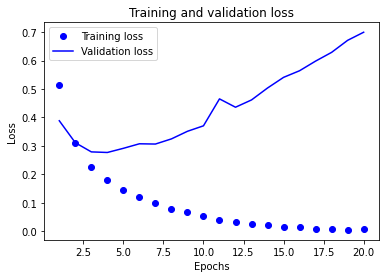

In [18]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history_dict['acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

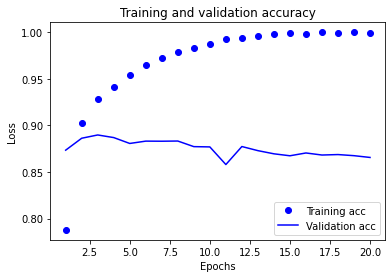

In [19]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [20]:
model2 = models.Sequential()
model2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['accuracy'])

model2.fit(x_train, y_train, epochs=4, batch_size=512)
results = model2.evaluate(x_test, y_test)


Epoch 1/4
49/49 [==============================] - 2s 26ms/step - loss: 0.4607 - accuracy: 0.8279
Epoch 2/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2668 - accuracy: 0.9093
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2032 - accuracy: 0.9287
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2967 - accuracy: 0.8835


In [21]:
results

[0.29674386978149414, 0.8835200071334839]

In [22]:
model.predict(x_test)

array([[0.00256959],
       [1.        ],
       [0.73253226],
       ...,
       [0.00136361],
       [0.00387204],
       [0.70162636]], dtype=float32)

In [23]:
model2.predict(x_test)

array([[0.16756767],
       [0.99989486],
       [0.8679795 ],
       ...,
       [0.10326126],
       [0.06700075],
       [0.6121143 ]], dtype=float32)

In [24]:
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
#model3.add(layers.Dense(16, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['accuracy'])

model3.fit(x_train, y_train, epochs=4, batch_size=512)
results = model3.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 27ms/step - loss: 0.4491 - accuracy: 0.8286
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2751 - accuracy: 0.9088
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2189 - accuracy: 0.9262
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2823 - accuracy: 0.8867


In [25]:
model4 = models.Sequential()
model4.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model4.add(layers.Dense(16, activation='tanh'))
model4.add(layers.Dense(16, activation='tanh'))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['accuracy'])

model4.fit(x_train, y_train, epochs=4, batch_size=512)
results = model4.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 31ms/step - loss: 0.4035 - accuracy: 0.8276
Epoch 2/4
49/49 [==============================] - 2s 31ms/step - loss: 0.2226 - accuracy: 0.9170
Epoch 3/4
49/49 [==============================] - 2s 31ms/step - loss: 0.1786 - accuracy: 0.9344
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3445 - accuracy: 0.8700
